# Usaremos, novamente, a base de dados com informações econômicas de países. 
Se você não conseguiu terminar todos os passos de limpeza e preparação da base de dados da ultima aula,importe a base já tratada, abaixo.

In [1]:
import pandas as pd
url= ('https://github.com/thaissalzer/thaissalzer/blob/0aeff8ad21652a0d060a81323138eb3d02ab56e6/aula8.xlsx?raw=true')
df= pd.read_excel(url)
df.head()


,Time,Country Name,GDP_PC,FBKF,populacao,forca_trab_educ,arable_land,industria_PERCPIB,gasto_educ_PERCPIB
0,2020,Argentina,8496.424142,5.403807e+10,4.537676e+07,77.239998,0.719151,22.180573,5.01605
1,2020,Australia,51720.370763,3.003566e+11,2.565529e+07,76.830002,1.194452,25.406283,6.10000
2,2020,Brazil,6794.489159,2.405663e+11,2.131963e+08,79.400002,0.261552,17.701653,NaN
3,2020,China,10408.669756,6.240217e+12,1.411100e+09,NaN,0.084667,37.842826,3.57000
4,2020,France,39055.282928,6.051972e+11,6.757111e+07,75.650002,0.265743,16.495439,5.50000


# Encontre os 5 países com maior e os 5 com menor renda per capita (GDP_PC)

In [2]:
df.sort_values(by='GDP_PC',ascending=False).head()

,Time,Country Name,GDP_PC,FBKF,populacao,forca_trab_educ,arable_land,industria_PERCPIB,gasto_educ_PERCPIB
138,2020,Monaco,182538.638340,NaN,36922.0,NaN,NaN,14.876453,NaN
123,2020,Liechtenstein,157754.954374,NaN,38756.0,NaN,0.036381,NaN,NaN
125,2020,Luxembourg,117370.496900,1.221500e+10,630419.0,79.550003,0.098554,11.333018,4.970000
39,2020,Bermuda,107791.886435,8.428690e+08,63893.0,NaN,0.004695,5.634176,1.874771
16,2020,Switzerland,85656.322666,1.966388e+11,8638167.0,81.269997,0.046288,24.812267,5.220000


In [3]:
df.sort_values(by='GDP_PC',ascending=False).tail()

,Time,Country Name,GDP_PC,FBKF,populacao,forca_trab_educ,arable_land,industria_PERCPIB,gasto_educ_PERCPIB
127,2020,Madagascar,462.404224,2.548706e+09,28225177.0,NaN,0.106288,19.466187,3.09571
142,2020,Mozambique,449.955210,3.242242e+09,31178239.0,NaN,0.181216,21.622691,6.26059
54,2020,Central African Republic,435.469252,4.257613e+08,5343020.0,NaN,0.336888,20.448189,2.16670
181,2020,Somalia,416.217775,9.390000e+08,16537016.0,NaN,0.066517,NaN,NaN
48,2020,Burundi,216.826741,3.032807e+08,12220227.0,59.16,0.098198,10.742950,5.04098


# Vamos dividir os países em 5 grupos (quintis), de acordo com seu nível de riqueza

Com base na variável 'GDP_PC' (PIB per capta), divida a base de dados em 5 grupos de países (quintis), lembrando que cada grupo deve conter 20% dos dados:
labels = "pobres", "medio pobres", 'medio', "medio ricos", "ricos".

"Quintil" deve ser o nome da nova variável que contém, como labels, "pobres", "medio pobres", 'medio', "medio ricos", "ricos".

Depois analise as médias de cada variável para cada um desses grupos, separadamente.

In [4]:
Q1 = df['GDP_PC'].quantile(0.2)
Q2 = df['GDP_PC'].quantile(0.4)
Q3 = df['GDP_PC'].quantile(0.6)
Q4 = df['GDP_PC'].quantile(0.8)
print('Primeiro quintil ', Q1)
print('Segundo quintil', Q2)
print('Terceiro quintil ', Q3)
print('Quarto quintil ', Q4)

Primeiro quintil  1719.895064744117
Segundo quintil 4606.064551692877
Terceiro quintil  8262.479253428803
Quarto quintil  23862.71099291217


In [5]:
df['QuintilRank']= pd.qcut(df['GDP_PC'], 
                             q = 5, labels = ["pobres", "medio pobres", 'medio', "medio ricos", "ricos"])

In [6]:
df

,Time,Country Name,GDP_PC,FBKF,populacao,forca_trab_educ,arable_land,industria_PERCPIB,gasto_educ_PERCPIB,QuintilRank
0,2020,Argentina,8496.424142,5.403807e+10,4.537676e+07,77.239998,0.719151,22.180573,5.01605,medio ricos
1,2020,Australia,51720.370763,3.003566e+11,2.565529e+07,76.830002,1.194452,25.406283,6.10000,ricos
2,2020,Brazil,6794.489159,2.405663e+11,2.131963e+08,79.400002,0.261552,17.701653,NaN,medio
3,2020,China,10408.669756,6.240217e+12,1.411100e+09,NaN,0.084667,37.842826,3.57000,medio ricos
4,2020,France,39055.282928,6.051972e+11,6.757111e+07,75.650002,0.265743,16.495439,5.50000,ricos
...,...,...,...,...,...,...,...,...,...,...
261,2020,Sub-Saharan Africa,1493.100691,3.822526e+11,1.151302e+09,NaN,0.193428,26.252761,3.44302,pobres
262,2020,Sub-Saharan Africa (excluding high income),1492.134018,3.819599e+11,1.151203e+09,NaN,0.193444,26.263597,3.44302,pobres
263,2020,Sub-Saharan Africa (IDA & IBRD countries),1493.100691,3.822526e+11,1.151302e+09,NaN,0.193428,26.252761,3.44302,pobres
264,2020,Upper middle income,9157.820016,7.847549e+12,2.495285e+09,NaN,0.191337,34.099423,4.13413,medio ricos


In [7]:
colunas_para_media = ['GDP_PC', 'forca_trab_educ', 'arable_land', 'industria_PERCPIB', 'gasto_educ_PERCPIB']
media_por_quintil = df.groupby('QuintilRank')[colunas_para_media].mean()

print(media_por_quintil)

                    GDP_PC  forca_trab_educ  arable_land  industria_PERCPIB  \
QuintilRank                                                                   
pobres         1035.782638        65.079999     0.196228          24.306302   
medio pobres   3133.185477        71.016597     0.140828          26.283569   
medio          6155.164013        78.126909     0.184819          27.060826   
medio ricos   13908.919225        77.602352     0.234793          25.431704   
ricos         52341.890314        78.129279     0.166882          23.541765   

              gasto_educ_PERCPIB  
QuintilRank                       
pobres                  3.693415  
medio pobres            4.704653  
medio                   4.761909  
medio ricos             4.395483  
ricos                   5.162111  


C:\Users\thais\AppData\Local\Temp\ipykernel_28980\4132177110.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_quintil = df.groupby('QuintilRank')[colunas_para_media].mean()


# Quais conclusões você pode tirar dos dados?

# Regressão Linear

No exercício da aula sobre Análise de Dados em Alto Desempenho, criamos um dataframe com informações de mulheres, trabalhadoras do mercado formal de trabalho, que utilizaremos nessa aula.

In [8]:
import pandas as pd
url= ('https://github.com/thaissalzer/thaissalzer/blob/9f8739186278cd535fcff5a8f75c3322ec506cfc/mulheres.xlsx?raw=true')
df= pd.read_excel(url)

In [16]:
df.head()

,uf,genero,fx_etaria,escolaridade,tamestab,rem_dezem,temp_empr,salario
0,SP,FEMININO,50 A 64,SUP. COMP,DE 500 A 999,48.689999,416.600010,20206.349585
1,SP,FEMININO,50 A 64,SUP. COMP,1000 OU MAIS,4.240000,172.600010,1759.599917
2,RJ,FEMININO,50 A 64,SUP. COMP,1000 OU MAIS,20.559999,350.399990,8532.399585
3,SP,FEMININO,40 A 49,SUP. COMP,DE 50 A 99,14.590000,46.299999,6054.850000
4,AM,FEMININO,50 A 64,SUP. COMP,DE 50 A 99,11.730000,418.899990,4867.950000


A literatura de economia do trabalho diz que escolaridade e experiência no mesmo emprego (tempo de emprego) são variáveis que explicam o salário do indivíduo. Vamos testar isso.

## Veja a correlação entre as variáveis contínuas do dataframe.


Você vai precisar criar um novo dataframe com as variáveis continuas (rem_dezem,	temp_empr, salario), ou informar, na hora de criar o comando, que quer a correlação apenas de um grupo de variável.

In [9]:
colunas_selecionadas = ['salario', 'rem_dezem', 'temp_empr']
df_var_numeric = df[colunas_selecionadas]

In [10]:
df_var_numeric.corr()

,salario,rem_dezem,temp_empr
salario,1.000000,1.000000,0.086454
rem_dezem,1.000000,1.000000,0.086454
temp_empr,0.086454,0.086454,1.000000


###  O sns.scatterplot() é usado para criar um gráfico de dispersão simples.

Faça um scatterplot com x = temp_empr e y = salario


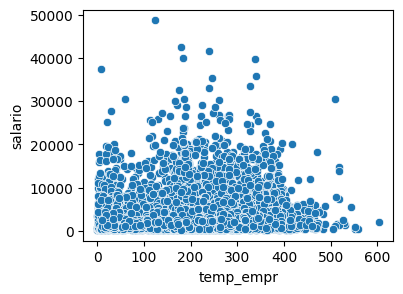

In [11]:
# importando a biblioteca necessária
import seaborn as sns
import matplotlib.pyplot as plt
# gráfico de dispersão (scatter plot) que relaciona essas duas variáveis
#sns.scatterplot(x='temp_empr', y='salario', data=df);
# Crie o gráfico com as dimensões especificadas
plt.figure(figsize=(4, 3)) # tamanho em polegadas
sns.scatterplot(x='temp_empr', y='salario', data=df)

# Exiba o gráfico
plt.show()

O sns.regplot() também cria um gráfico de dispersão, mas, além disso, ajusta automaticamente uma linha de regressão linear aos dados e a desenha no gráfico.

### Crie um regplot

<Axes: xlabel='temp_empr', ylabel='salario'>

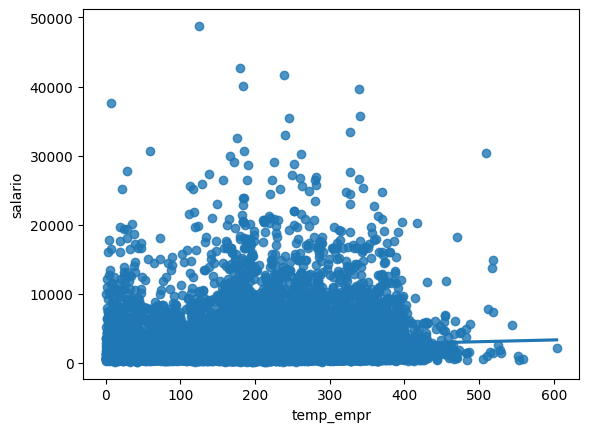

In [12]:
sns.regplot(x='temp_empr', y='salario', data=df)


### Parece haver uma correlação baixa entre as variáveis, correto? Faça uma regressão simples com essas variáveis (y= salario e x = temp_empr) e analise seus resultados.

In [13]:
import pandas as pd
import statsmodels.api as sm

# Ajustar o modelo de regressão linear
X = sm.add_constant(df['temp_empr'])  # Adicione uma constante (intercepto)
Y = df['salario']
model = sm.OLS(Y, X).fit()

# Obter os coeficientes do modelo
intercepto, coeficiente_temp_emp = model.params

# Imprimir a fórmula da regressão
formula = f"salario = {intercepto:.2f} + {coeficiente_temp_emp:.2f} * temp_empr + Erro"
print("Equação de regressão linear:")
print(formula)


Equação de regressão linear:
salario = 1775.43 + 2.58 * temp_empr + Erro


Como explicar esse modelo?

- 1775.43: Este é o intercepto do modelo. Representa o valor estimado do salário quando o tempo de emprego no mesmo trabalho é zero. 

- 2.58: Este é o coeficiente associado aos anos de estudo. Indica o quanto esperamos que o salário aumente (ou diminua) para cada ano adicional tempo de emprego. Neste caso, o coeficiente sugere que, em média, para cada ano adicional de trabalho no mesmo emprego, o salário aumenta em 2.58.

Analise as informações após rodar a formula abaixo

In [14]:
# Obter a equação da regressão
equacao_regressao = model.summary()
# Exibir a equação
print(equacao_regressao)

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           4.12e-35
Time:                        11:09:00   Log-Likelihood:            -1.9124e+05
No. Observations:               20377   AIC:                         3.825e+05
Df Residuals:                   20375   BIC:                         3.825e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1775.4314     47.414     37.445      0.0

### Agora vamos ver se a escolaridade afeta mais o salário dos indivíduos.

Inicialmente, faça o Ordinal Encoder da variável escolaridade. Analise as novas variáveis geradas no seu dataframe.

A ordem que queremos ( de 0 a 7) é "ATE 5.A INC'", "5.A CO FUND", "6. A 9. FUND","FUND COMPL","MEDIO INCOMP'","MEDIO COMPL","SUP. INCOMP", "SUP. COMP"

In [15]:
## Usamos o OneHotEncoder

#checando os valores únicos de genero
df['escolaridade'].unique()

array(['SUP. COMP', 'MEDIO COMPL', 'SUP. INCOMP', '5.A CO FUND',
       'FUND COMPL', 'MEDIO INCOMP', '6. A 9. FUND', 'ATE 5.A INC'],
      dtype=object)

In [22]:
# Podemos especificar a ordem das categorias

# Vamos converter grau_de_instr em números
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["ATE 5.A INC", "5.A CO FUND", "6. A 9. FUND","FUND COMPL","MEDIO INCOMP","MEDIO COMPL","SUP. INCOMP", "SUP. COMP"]])

# Fit it
ordinal_encoder.fit(df[["escolaridade"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df["encoded_escolaridade"] = ordinal_encoder.transform(df[["escolaridade"]])

# Showing the transformed estudo
df

[array(['ATE 5.A INC', '5.A CO FUND', '6. A 9. FUND', 'FUND COMPL',
        'MEDIO INCOMP', 'MEDIO COMPL', 'SUP. INCOMP', 'SUP. COMP'],
       dtype=object)]

,uf,genero,fx_etaria,escolaridade,tamestab,rem_dezem,temp_empr,salario,encoded_escolaridade
0,SP,FEMININO,50 A 64,SUP. COMP,DE 500 A 999,48.689999,416.600010,20206.349585,7.0
1,SP,FEMININO,50 A 64,SUP. COMP,1000 OU MAIS,4.240000,172.600010,1759.599917,7.0
2,RJ,FEMININO,50 A 64,SUP. COMP,1000 OU MAIS,20.559999,350.399990,8532.399585,7.0
3,SP,FEMININO,40 A 49,SUP. COMP,DE 50 A 99,14.590000,46.299999,6054.850000,7.0
4,AM,FEMININO,50 A 64,SUP. COMP,DE 50 A 99,11.730000,418.899990,4867.950000,7.0
...,...,...,...,...,...,...,...,...,...
20372,SP,FEMININO,50 A 64,MEDIO COMPL,1000 OU MAIS,1.860000,196.000000,771.900000,5.0
20373,SP,FEMININO,40 A 49,MEDIO COMPL,1000 OU MAIS,3.100000,91.599998,1286.499959,5.0
20374,SP,FEMININO,40 A 49,MEDIO COMPL,1000 OU MAIS,4.730000,190.700000,1962.950000,5.0
20375,SP,FEMININO,40 A 49,MEDIO COMPL,1000 OU MAIS,0.600000,180.100010,249.000008,5.0


### Agora, analise a correlação das variáveis (continuas) com a nova variável criada e crie uma regressão multipla, para tentar analisar se o salário pode ser explicado pelo tempo de emprego e pela escolaridade.

Analise os coeficientes da regressão, seu R-squared, p-value e demais elementos estudados na aula.
Como você poderia melhorar esse modelo?

In [25]:
colunas_selecionadas = ['salario', 'rem_dezem', 'temp_empr', 'encoded_escolaridade']
df_var_numeric = df[colunas_selecionadas]
df_var_numeric.corr()

,salario,rem_dezem,temp_empr,encoded_escolaridade
salario,1.000000,1.000000,0.086454,0.336370
rem_dezem,1.000000,1.000000,0.086454,0.336370
temp_empr,0.086454,0.086454,1.000000,-0.005382
encoded_escolaridade,0.336370,0.336370,-0.005382,1.000000


In [27]:
# run OLS model
import statsmodels.formula.api as smf

model2 = smf.ols(formula="salario ~ temp_empr + encoded_escolaridade", data=df).fit()
model2.rsquared


0.12093551837028582

In [28]:
model2.params


Intercept              -752.728649
temp_empr                 2.635853
encoded_escolaridade    493.023563
dtype: float64

In [29]:
# Obter a equação da regressão
equacao_regressao = model2.summary()
# Exibir a equação
print(equacao_regressao)

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1401.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:24:35   Log-Likelihood:            -1.9001e+05
No. Observations:               20377   AIC:                         3.800e+05
Df Residuals:                   20374   BIC:                         3.800e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -752.7286 